In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import os
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%time
vff = pd.read_csv('data/fitted_single_clusters/NNNlib2b_DNA_20211022.CPvariant', sep='\t')
vf = pd.read_csv('data/fitted_single_clusters/NNNlib2b_DNA_20211022_no_filter.CPvariant', sep='\t')

CPU times: user 161 ms, sys: 30.2 ms, total: 191 ms
Wall time: 192 ms


In [9]:
vf.columns

Index(['RefSeq', 'dH_init', 'Tm_init', 'fmax_init', 'fmin_init', 'numTests',
       'fitFraction', 'pvalue', 'numClusters', 'dH_lb', 'dH', 'dH_ub', 'Tm_lb',
       'Tm', 'Tm_ub', 'fmax_lb', 'fmax', 'fmax_ub', 'fmin_lb', 'fmin',
       'fmin_ub', 'rsqr', 'numIter', 'flag'],
      dtype='object')

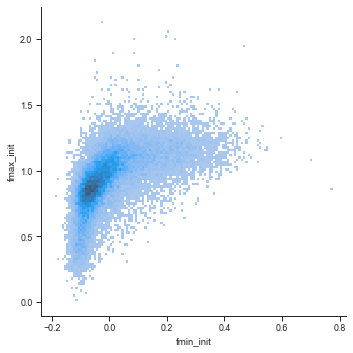

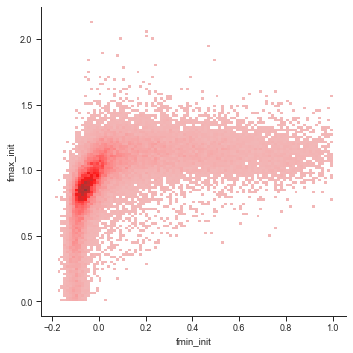

In [4]:
# fig, ax = plt.subplots(1,2,figsize=(6,3))
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 1 & fmax_init > 0 & fmax_init < 3'
sns.displot(data=vf.query(query), x='fmin_init', y='fmax_init')
sns.displot(data=vff.query(query), x='fmin_init', y='fmax_init',color='r')
plt.show()

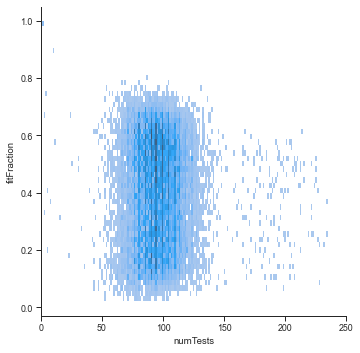

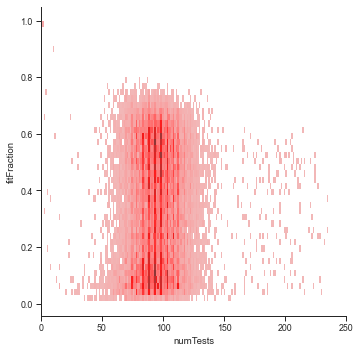

In [23]:
# fig, ax = plt.subplots(1,2,figsize=(6,3))
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 1 & fmax_init > 0 & fmax_init < 3'
sns.displot(data=vf.query(query), x='numTests', y='fitFraction')
plt.xlim([0, 250])
sns.displot(data=vff.query(query), x='numTests', y='fitFraction',color='r')
plt.xlim([0, 250])
plt.show()

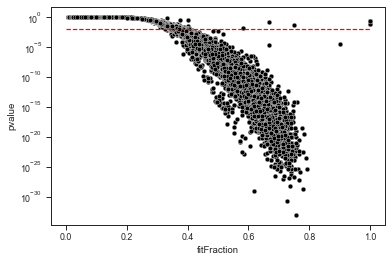

In [134]:
sns.scatterplot(data=vff.query(query), x='fitFraction', y='pvalue', color='k')
plt.yscale("log")
cutoff = 0.01
plt.plot([0, 1], [cutoff]*2, 'r--')

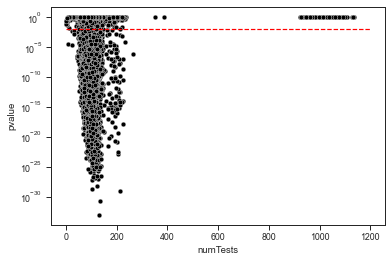

In [132]:
sns.scatterplot(data=vff.query(query), x='numTests', y='pvalue', color='k')
plt.yscale("log")
cutoff = 0.01
plt.plot([0, 1200], [cutoff]*2, 'r--')

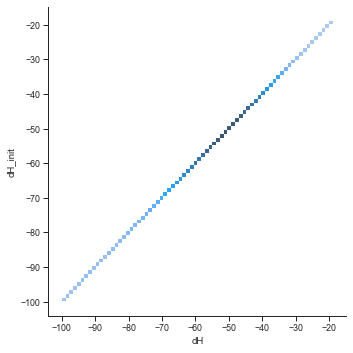

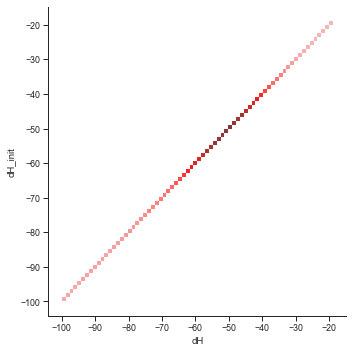

In [31]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 0.75 & fmax_init > 0 & fmax_init < 3 & dH > -100'
sns.displot(data=vf.query(query), x='dH', y='dH_init')
sns.displot(data=vff.query(query), x='dH', y='dH_init', color='r')
plt.show()

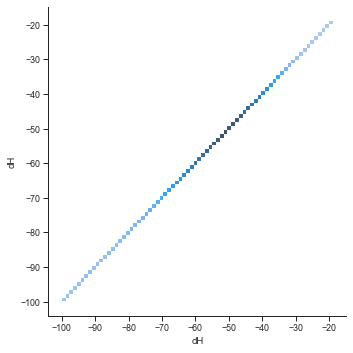

In [61]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 0.75 & fmax_init > 0 & fmax_init < 3 & dH > -100'
sns.displot(x=vf.query(query).dH, y=vff.query(query).dH)
plt.show()

In [26]:
37+ 273.15

310.15

<AxesSubplot:xlabel='fmax', ylabel='Density'>

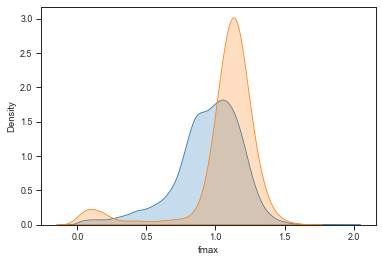

In [7]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 2 & fmax_init > 0 & fmax_init < 2 & dH_init > -400'
sns.kdeplot(vff.query(query).fmax, fill=True)
sns.kdeplot(vff.query(query).query('dH * (1 - 333.15/Tm) < 20 & dH * (1 - 333.15/Tm) > 7.5').fmax, fill=True)

<AxesSubplot:xlabel='fmax', ylabel='Density'>

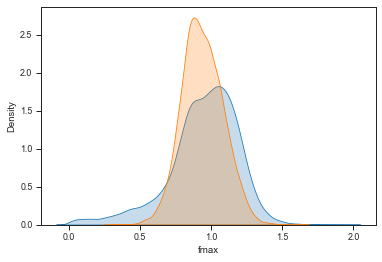

In [8]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 2 & fmax_init > 0 & fmax_init < 2 & dH_init > -400'
sns.kdeplot(vff.query(query).fmax, fill=True)
sns.kdeplot(vff.query(query).query('pvalue < 0.01').fmax, fill=True)

In [72]:
60+273.15

333.15

<AxesSubplot:xlabel='fmax', ylabel='Density'>

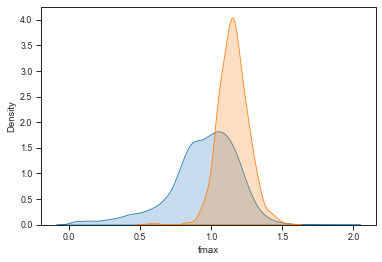

In [9]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 2 & fmax_init > 0 & fmax_init < 2 & dH_init > -400'
T = 60 + 273.15
sns.kdeplot(vff.query(query).fmax, fill=True)
sns.kdeplot(vff.query(query).query('1 / (1 + exp((dH/0.0019872) * (1/Tm - 1/310.15))) > .99 & fmax > 0.5').fmax, fill=True)

<AxesSubplot:xlabel='fmin', ylabel='Density'>

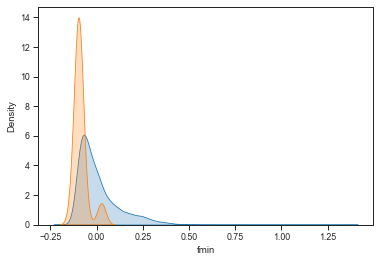

In [107]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 2 & fmax_init > 0 & fmax_init < 2 & dH_init > -400'
sns.kdeplot(vf.query(query).fmin, fill=True)
sns.kdeplot(vf.query(query).query('dH * (1 - 310/Tm) < -5 & dH * (1 - 310/Tm) > -10 & pvalue < 0.05').fmin, fill=True)

<AxesSubplot:xlabel='fmin', ylabel='Density'>

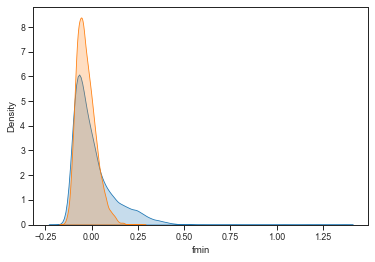

In [116]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 2 & fmax_init > 0 & fmax_init < 2 & dH_init > -400'
sns.kdeplot(vf.query(query).fmin, fill=True)
sns.kdeplot(vf.query(query).query('pvalue < 0.01').fmin, fill=True)

<AxesSubplot:xlabel='fmin', ylabel='Density'>

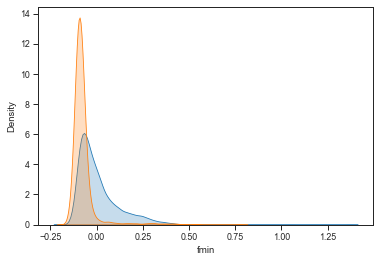

In [101]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 2 & fmax_init > 0 & fmax_init < 2 & dH_init > -400'
sns.kdeplot(vf.query(query).fmin, fill=True)
sns.kdeplot(vf.query(query).query('1 / (1 + exp((dH/0.0019872) * (1/Tm - 1/310.15))) < 0.01').fmin, fill=True)

Text(0.5, 6.368000000000002, 'dG (60°C)')

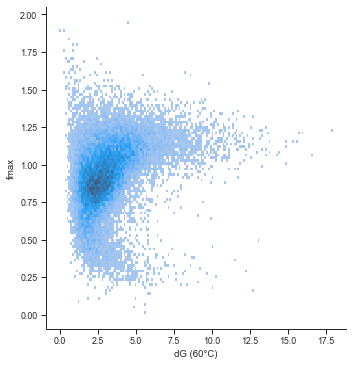

In [77]:
sns.displot(x=vff.query(query).dH * (1 - 333.15/vf.query(query).Tm), y=vff.query(query).fmax)
plt.xlabel("dG (60°C)")

310.15

Text(0.5, 6.368000000000002, 'dG (37°C)')

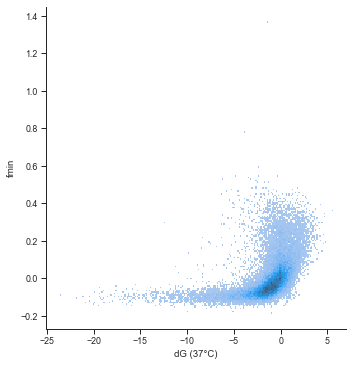

In [92]:
sns.displot(x=vff.query(query).dH * (1 - 310.15/vf.query(query).Tm), y=vff.query(query).fmin)
plt.xlabel("dG (37°C)")

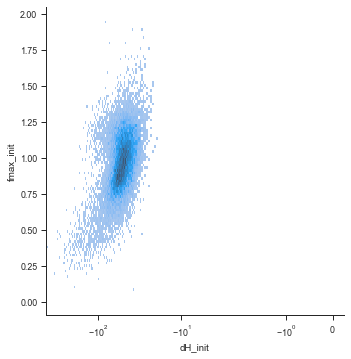

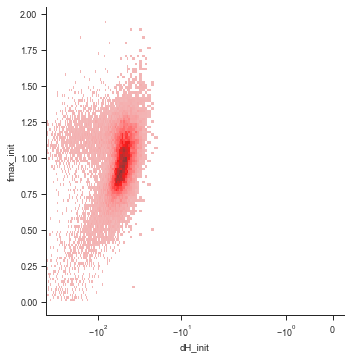

In [13]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 2 & fmax_init > 0 & fmax_init < 2 & dH_init > -400'
sns.displot(y=vf.query(query).fmax_init, x=vf.query(query).dH_init)
plt.xscale('symlog')
sns.displot(y=vff.query(query).fmax_init, x=vff.query(query).dH_init, color='r')
plt.xscale('symlog')
plt.show()

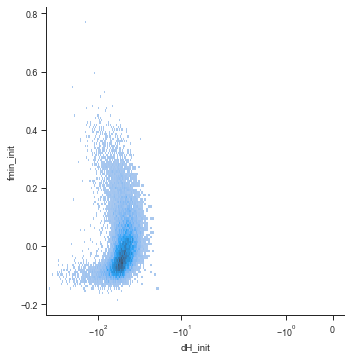

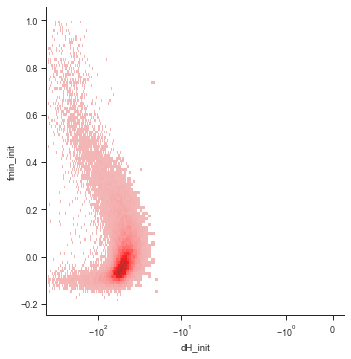

In [17]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 1 & fmax_init > 0 & fmax_init < 2 & dH_init > -400'
sns.displot(y=vf.query(query).fmin_init, x=vf.query(query).dH_init)
plt.xscale('symlog')
sns.displot(y=vff.query(query).fmin_init, x=vff.query(query).dH_init, color='r')
plt.xscale('symlog')
plt.show()

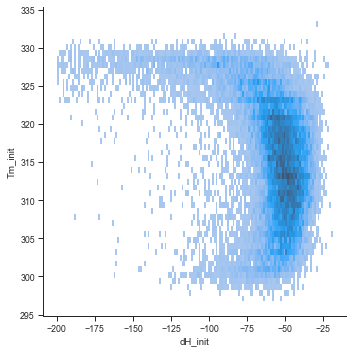

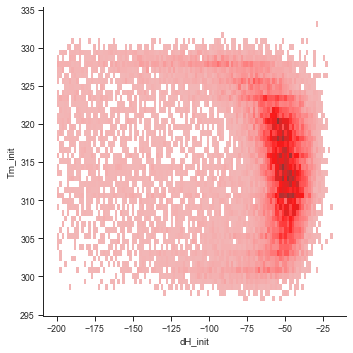

In [19]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 1 & fmax_init > 0 & fmax_init < 2 & dH_init > -200'
sns.displot(y=vf.query(query).Tm_init, x=vf.query(query).dH_init)
sns.displot(y=vff.query(query).Tm_init, x=vff.query(query).dH_init, color='r')
# plt.xscale('symlog')
plt.show()

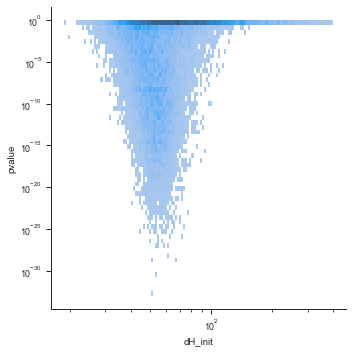

In [18]:
query = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 2 & fmax_init > 0 & fmax_init < 3 & dH_init > -400'
sns.displot(y=vf.query(query).pvalue, x=-vf.query(query).dH_init, log_scale=(True, True))
plt.show()

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rsqr', ylabel='Density'>

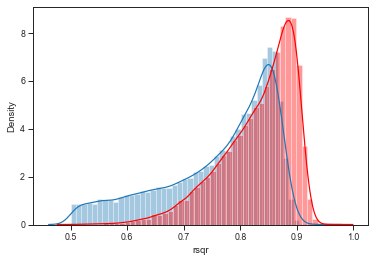

In [21]:
sns.distplot(vf.query(query).rsqr)
sns.distplot(vff.query(query).rsqr, color='r')

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pvalue', ylabel='Density'>

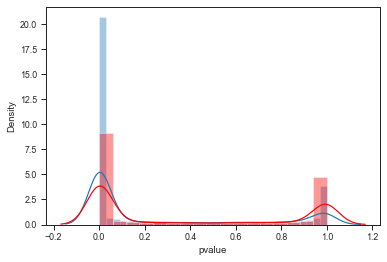

In [22]:
sns.distplot(vf.query(query).pvalue)
sns.distplot(vff.query(query).pvalue, color='r')

<AxesSubplot:xlabel='pvalue', ylabel='Proportion'>

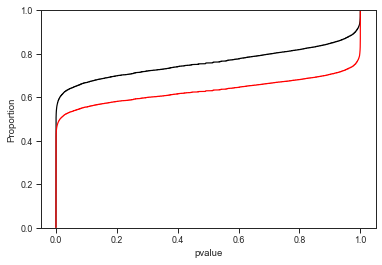

In [6]:
sns.ecdfplot(vf.query(query).pvalue, color='k')
sns.ecdfplot(vff.query(query).pvalue, color='r')

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fmax', ylabel='Density'>

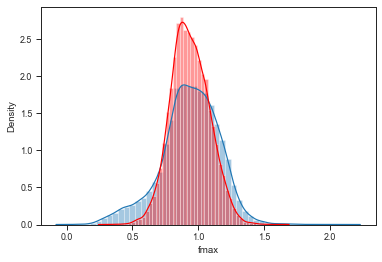

In [7]:
query_pvalue = 'rsqr > 0.5 & fmin_init > -1 & fmin_init < 2 & fmax_init > 0 & fmax_init < 2 & dH_init > -400 & pvalue < 0.01'
sns.distplot(vf.query(query).fmax)
sns.distplot(vf.query(query_pvalue).fmax, color='r')

<AxesSubplot:xlabel='fmin', ylabel='Density'>

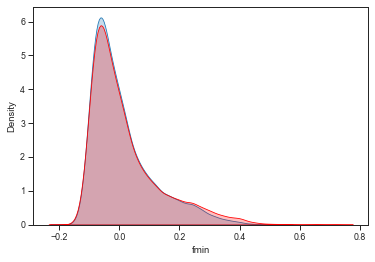

In [36]:
sns.kdeplot(vf.query(query).fmin, fill=True)
sns.kdeplot(vff.query(query).fmin, color='r', fill=True)

(-1.0, 1.0)

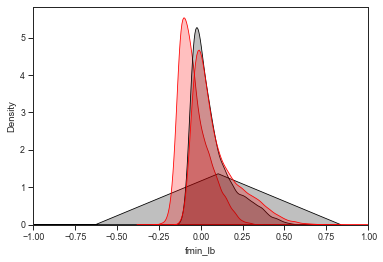

In [48]:
sns.kdeplot(vf.query(query).fmin_lb, color='k', fill=True)
sns.kdeplot(vff.query(query).fmin_lb, color='r', fill=True)
sns.kdeplot(vf.query(query).fmin_ub, fill=True, color='k')
sns.kdeplot(vff.query(query).fmin_ub, color='r', fill=True)
plt.xlim([-1, 1])

(0.0, 2.0)

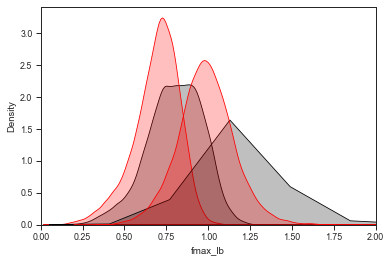

In [50]:
sns.kdeplot(vf.query(query).fmax_lb, color='k', fill=True)
sns.kdeplot(vff.query(query).fmax_lb, color='r', fill=True)
sns.kdeplot(vf.query(query).fmax_ub, fill=True, color='k')
sns.kdeplot(vff.query(query).fmax_ub, color='r', fill=True)
plt.xlim([0, 2])

(-0.5, 2.0)

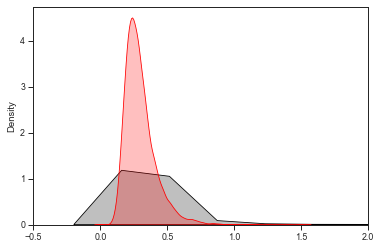

In [52]:
sns.kdeplot(vf.query(query).fmax_ub - vf.query(query).fmax_lb, color='k', fill=True)
sns.kdeplot(vff.query(query).fmax_ub - vff.query(query).fmax_lb, color='r', fill=True)
plt.xlim([-.5, 2])

(-0.5, 1.5)

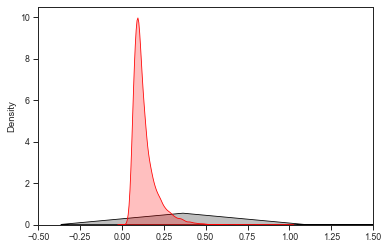

In [54]:
sns.kdeplot(vf.query(query).fmin_ub - vf.query(query).fmin_lb, color='k', fill=True)
sns.kdeplot(vff.query(query).fmin_ub - vff.query(query).fmin_lb, color='r', fill=True)
plt.xlim([-.5, 1.5])

(-0.5, 100.0)

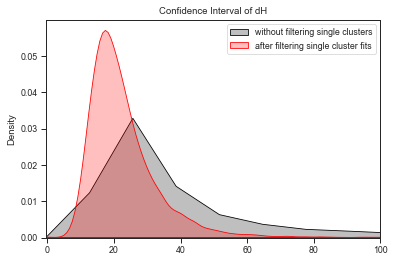

In [60]:
sns.kdeplot(vf.query(query). dH_ub - vf.query(query).dH_lb, color='k', fill=True)
sns.kdeplot(vff.query(query).dH_ub - vff.query(query).dH_lb, color='r', fill=True)
plt.title('Confidence Interval of dH')
plt.legend(['without filtering single clusters', 'after filtering single cluster fits'])
plt.xlim([-.5, 100])

(-0.5, 100.0)

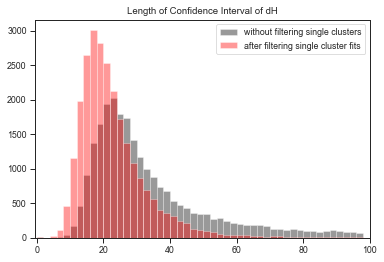

In [79]:
sns.distplot(vf.query(query). dH_ub - vf.query(query).dH_lb, color='k', kde=False, bins=range(0,100,2))
sns.distplot(vff.query(query).dH_ub - vff.query(query).dH_lb, color='r', kde=False, bins=range(0,100,2))
plt.title('Length of Confidence Interval of dH')
plt.legend(['without filtering single clusters', 'after filtering single cluster fits'])
plt.xlim([-.5, 100])

(-0.5, 20.0)

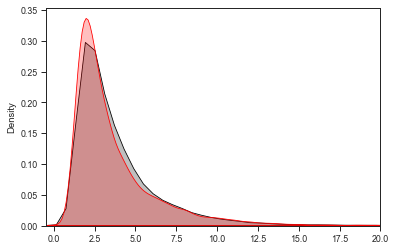

In [58]:
sns.kdeplot(vf.query(query). Tm_ub - vf.query(query).Tm_lb, color='k', fill=True)
sns.kdeplot(vff.query(query).Tm_ub - vff.query(query).Tm_lb, color='r', fill=True)
plt.xlim([-.5, 20])

<AxesSubplot:xlabel='fmax', ylabel='Density'>

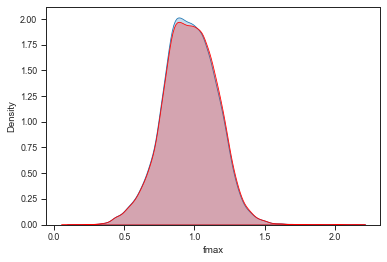

In [37]:
sns.kdeplot(vf.query(query).fmax, fill=True)
sns.kdeplot(vff.query(query).fmax, color='r', fill=True)

In [ ]:
sns.distplot(vf.query(query). dH_ub - vf.query(query).dH_lb, color='k', kde=False, bins=range(0,100,2))